In [1]:
import matplotlib.pyplot as plt
# Create labels for the x-axis (temperature ranges)
import pandas as pd
import numpy as np
from Helper_fun import generate_temp_range

In [2]:
t_deltas = [5]
agg_fact_list=[1,2,3,5,10]
min_temp_array, max_temp_array = generate_temp_range(t_deltas)

In [3]:
glaciation_counter=0
cloud_count=np.empty((len(agg_fact_list),len(min_temp_array)))
glaciation_counter_agg=np.zeros(len(agg_fact_list))
for i in range(len(min_temp_array)):
    for j in range(len(agg_fact_list)):
        agg_fact=agg_fact_list[j]
        min_temp=min_temp_array[i]
        max_temp=max_temp_array[i]
        df=pd.read_csv(f"/cluster/work/climate/dnikolo/Cloud_analysis/T_{abs(round(min_temp))}_{abs(round(max_temp))}_agg_{agg_fact}_tracknumber.csv")
        total=df['is_liq']+df['is_mix']+df['is_ice']
        total=df['is_liq'].size
        glaciation_counter_agg[j]+=(df['is_liq']& df['is_mix'] & df['is_ice']).astype(bool).sum(axis=0)
        
        cloud_count[j,i]=total
        


In [4]:
glaciation_counter_temp=np.zeros(len(min_temp_array))
for i in range(len(min_temp_array)):
    agg_fact=agg_fact_list[j]
    min_temp=min_temp_array[i]
    max_temp=max_temp_array[i]
    df=pd.read_csv(f"/cluster/work/climate/dnikolo/Cloud_analysis/T_{abs(round(min_temp))}_{abs(round(max_temp))}_agg_1_tracknumber.csv")
    glaciation_counter_temp[i]+=(df['is_liq']& df['is_mix'] & df['is_ice']).astype(bool).sum(axis=0)
glaciation_counter_temp


array([0., 0., 0., 2., 1., 1., 2.])

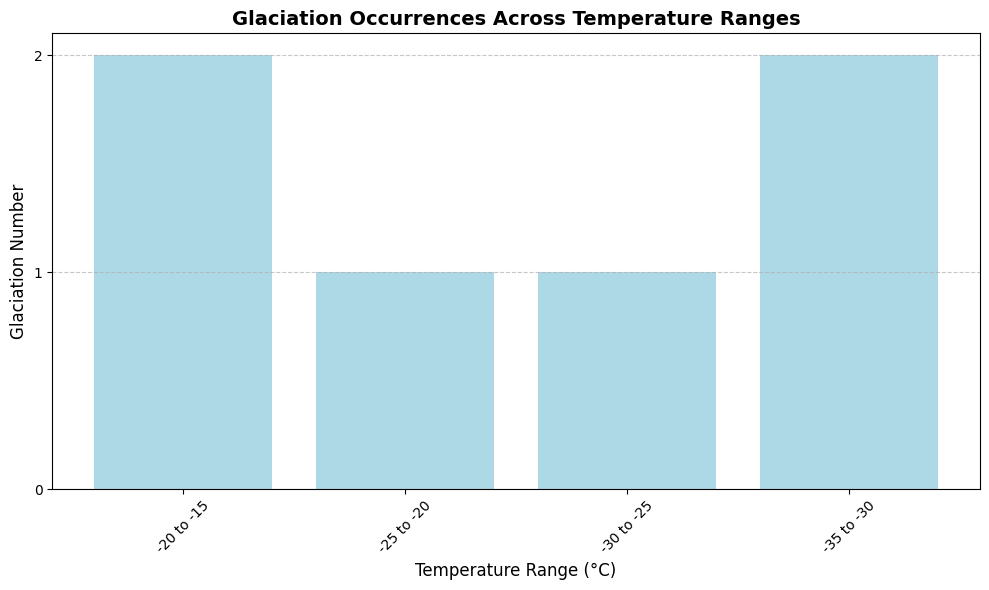

In [5]:
import matplotlib.pyplot as plt

# Create labels for the x-axis (temperature ranges)
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range(3, len(min_temp_array))]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, glaciation_counter_temp[3:], color='lightblue', label="N glaciations")

# Add title and labels
plt.title('Glaciation Occurrences Across Temperature Ranges', fontsize=14, fontweight='bold')
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Glaciation Number', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis to show only integer values
plt.gca().yaxis.get_major_locator().set_params(integer=True)

# Show the plot
plt.tight_layout()
plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/glaciation_counter_temp_1.png', dpi=400)
plt.show()

In [6]:
tmp_bin_array=np.arange(-80,81,10)
tmp_bin_array

array([-80, -70, -60, -50, -40, -30, -20, -10,   0,  10,  20,  30,  40,
        50,  60,  70,  80])

In [7]:
glaciation_counter_temp=np.zeros(len(min_temp_array))
tmp_bins=pd.IntervalIndex.from_arrays(tmp_bin_array[0:-1],tmp_bin_array[1:])
latitude_counts= pd.DataFrame(np.zeros(len(tmp_bin_array)-1), index=tmp_bins,columns=["n_clouds"])
for i in range(len(min_temp_array)):
    agg_fact=agg_fact_list[j]
    min_temp=min_temp_array[i]
    max_temp=max_temp_array[i]
    df=pd.read_csv(f"/cluster/work/climate/dnikolo/Cloud_analysis/T_{abs(round(min_temp))}_{abs(round(max_temp))}_agg_3_tracknumber.csv")
    glaciation_counter_temp[i]+=(df['is_liq']& df['is_mix'] & df['is_ice']).astype(bool).sum(axis=0)
    latitude_counts["n_clouds"]+=pd.cut(df[df["max_ice_fraction"]>0]['avg_lat'].dropna(), tmp_bin_array).value_counts()

glaciation_counter_temp
latitude_counts

,n_clouds
"(-80, -70]",153.0
"(-70, -60]",169.0
"(-60, -50]",72.0
"(-50, -40]",76.0
"(-40, -30]",70.0
"(-30, -20]",34.0
"(-20, -10]",36.0
"(-10, 0]",31.0
"(0, 10]",42.0
"(10, 20]",4.0


<Axes: >

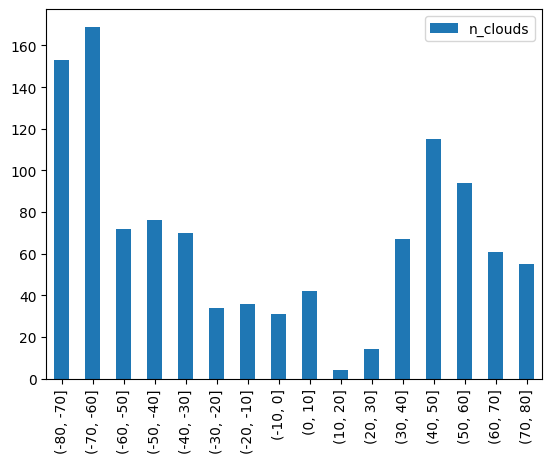

In [8]:
latitude_counts.plot.bar()

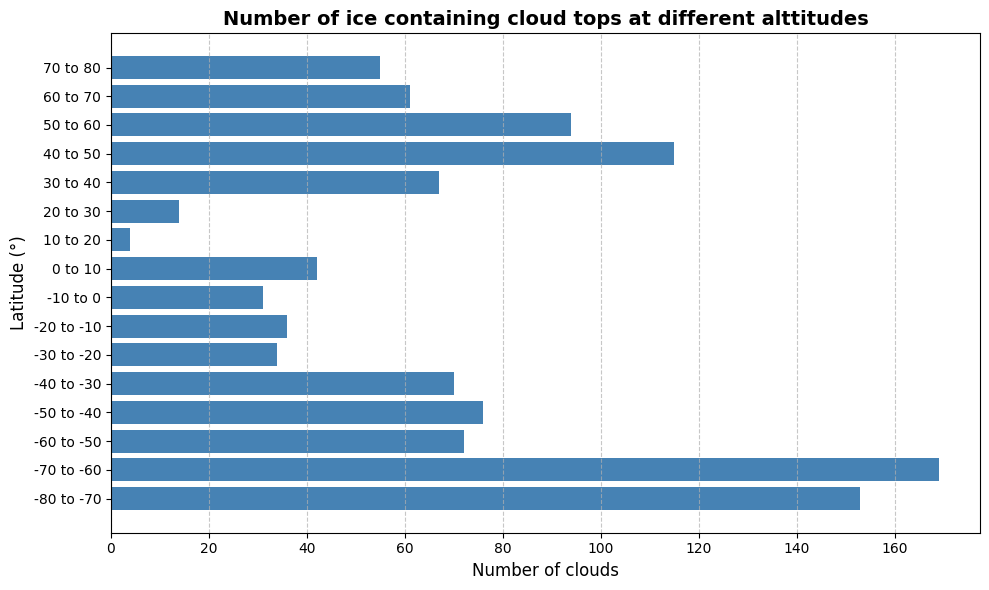

In [9]:
import matplotlib.pyplot as plt

# Create labels for the y-axis (temperature ranges)
labels = [f"{tmp_bin_array[i]} to {tmp_bin_array[i+1]}" for i in range(len(tmp_bin_array)-1)]

# Create the horizontal bar graph
plt.figure(figsize=(10, 6))

# Add gridlines for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Create horizontal bars using plt.barh() instead of plt.bar()
plt.barh(labels, latitude_counts["n_clouds"], color='#4682B4', label="N glaciations")

# Add title and labels
plt.title('Number of ice containing cloud tops at different alttitudes', fontsize=14, fontweight='bold')
plt.xlabel('Number of clouds', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)

# Format x-axis to show only integer values
plt.gca().xaxis.get_major_locator().set_params(integer=True)

# Show the plot
plt.tight_layout()
# plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/glaciation_counter_temp_3x3.png', dpi=400)
plt.show()

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np


# Dummy data for illustration
tmp_bin_array = [-80, -60, -40, -20, 0, 20, 40, 60, 80]
latitude_counts = {"n_clouds": [5, 15, 20, 10, 25, 15, 10, 5]}

# Calculate midpoints and bin widths
latitudes = [(tmp_bin_array[i] + tmp_bin_array[i + 1]) / 2 for i in range(len(tmp_bin_array) - 1)]
bin_widths = [tmp_bin_array[i + 1] - tmp_bin_array[i] - 1 for i in range(len(tmp_bin_array) - 1)]

# Create the figure and map axes
fig = plt.figure(figsize=(10, 6))
ax_map = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_map.set_extent([-80, 80, -80, 80], crs=ccrs.PlateCarree())
ax_map.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5)
ax_map.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth=0.5)
ax_map.add_feature(cfeature.LAND, facecolor='lightgray')
ax_map.add_feature(cfeature.LAND, edgecolor='black', linewidth=0.2)

# Add gridlines with specified latitude lines
gl = ax_map.gridlines(
    n_steps=10,
    draw_labels=True,
    color='gray',
    linestyle='--',
    linewidth=0.8
)
gl.top_labels = False  # Disable labels on the top
gl.bottom_labels = False  # Disable labels on the bottom
gl.right_labels = False  # Disable labels on the right

# Add specific latitudes for gridlines (including top and bottom latitudes)
latitudes_to_show = tmp_bin_array  # Include all latitude bin boundaries
gl.ylocator = plt.FixedLocator(latitudes_to_show)

# Create the second Axes for the bar chart, sharing the same extent
ax_bar = fig.add_axes(ax_map.get_position(), zorder=2)  # Align with the map
ax_bar.barh(latitudes, latitude_counts["n_clouds"], color='#4682B4',
            height=bin_widths, zorder=3, alpha=0.7)  # Use `height` for correct bin widths

# Remove the background of the bar chart (make transparent)
ax_bar.set_facecolor((1, 1, 1, 0))  # RGBA: white background, fully transparent

# Add title and labels for the bar chart
ax_bar.set_title('Number of Ice-Containing Cloud Tops at Different Latitudes', fontsize=14, fontweight='bold')
ax_bar.set_xlabel('Number of Clouds', fontsize=12)

# Remove the bar graph's y-axis labels
ax_bar.set_yticks([])  # Removes tick marks and labels on y-axis

# Set continuous latitude range for y-axis
ax_bar.set_ylim(tmp_bin_array[0] - 1, tmp_bin_array[-1] + 1)  # Full range of latitude bins

# Format x-axis to show only integer values
ax_bar.xaxis.get_major_locator().set_params(integer=True)

# Hide axes ticks and spines for the bar chart (optional for cleaner overlay)
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)
ax_bar.spines['left'].set_visible(False)
ax_bar.spines['bottom'].set_visible(False)
ax_bar.tick_params(left=False, bottom=False)

# Save and show the plot
# plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/N_ice_conaining_clouds_by_lat.png', dpi=400)
plt.show()



AttributeError: LineCollection.set() got an unexpected keyword argument 'n_steps'

<Figure size 1000x600 with 2 Axes>

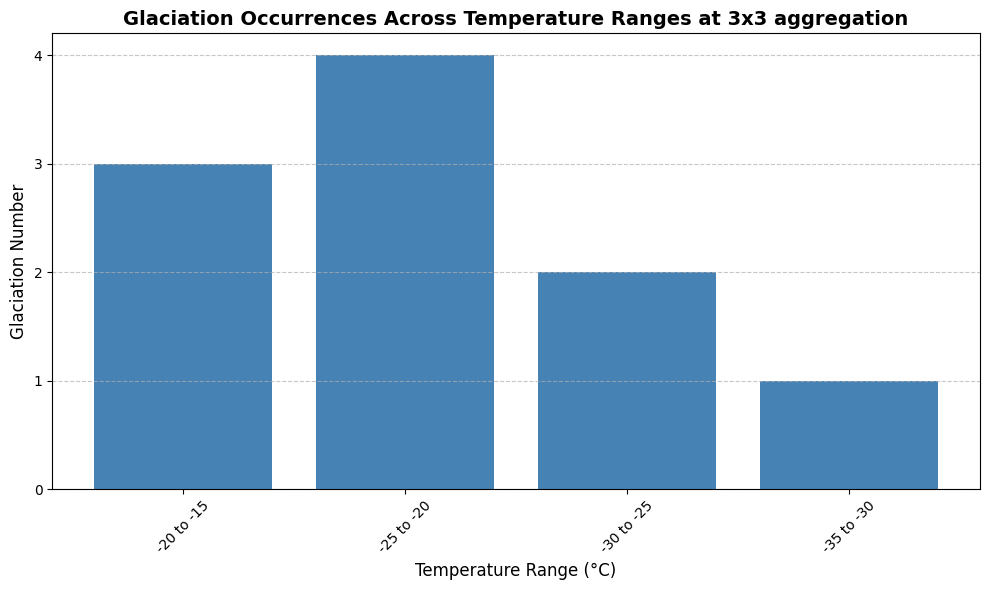

In [ ]:
import matplotlib.pyplot as plt

# Create labels for the x-axis (temperature ranges)
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range(3, len(min_temp_array))]

# Create the bar graph
plt.figure(figsize=(10, 6))
# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar(labels, glaciation_counter_temp[3:], color='#4682B4', label="N glaciations")

# Add title and labels
plt.title('Glaciation Occurrences Across Temperature Ranges at 3x3 aggregation', fontsize=14, fontweight='bold')
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Glaciation Number', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)



# Format y-axis to show only integer values
plt.gca().yaxis.get_major_locator().set_params(integer=True)

# Show the plot
plt.tight_layout()
plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/glaciation_counter_temp_3x3.png', dpi=400)
plt.show()

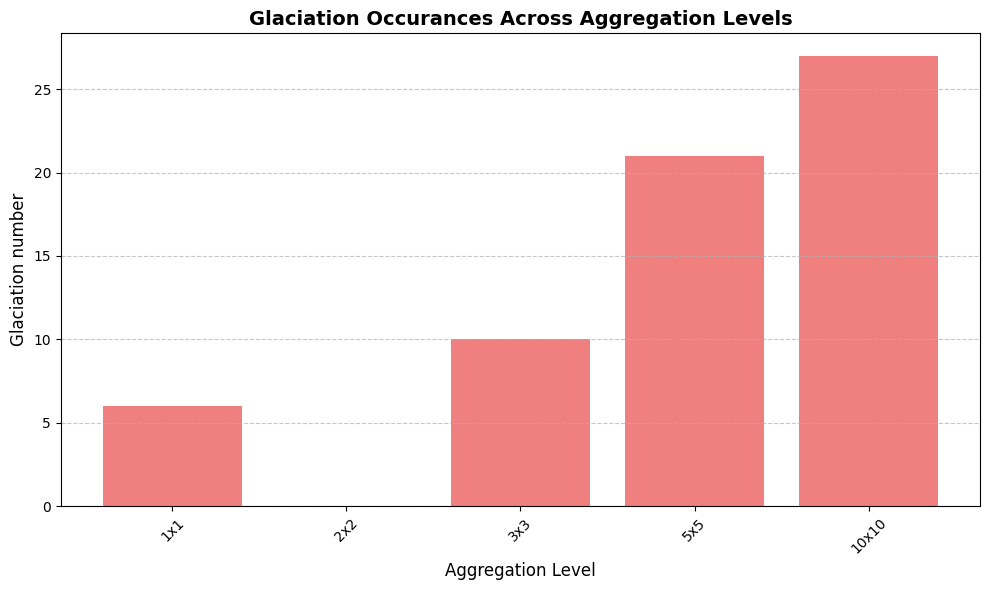

In [ ]:
# # Create labels for the x-axis (temperature ranges)


labels = [f"{agg_fact_list[i]}x{agg_fact_list[i]}" for i in range(len(agg_fact_list))]

# # Create the bar graph
plt.figure(figsize=(10,6))
# plt.bar(labels, n_track_arr[np.where(max_temp_array-min_temp_array==5)], color='skyblue',label="N tracks")
plt.bar(labels, glaciation_counter_agg, color='lightcoral',label="N glaciations")

# Add title and labels
plt.title('Glaciation Occurances Across Aggregation Levels', fontsize=14, fontweight='bold')
plt.xlabel('Aggregation Level', fontsize=12)
plt.ylabel('Glaciation number', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
# # Show the plot
plt.tight_layout()
plt.savefig(f'/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/glaciation_counter_agg.png',dpi=400)
plt.show()

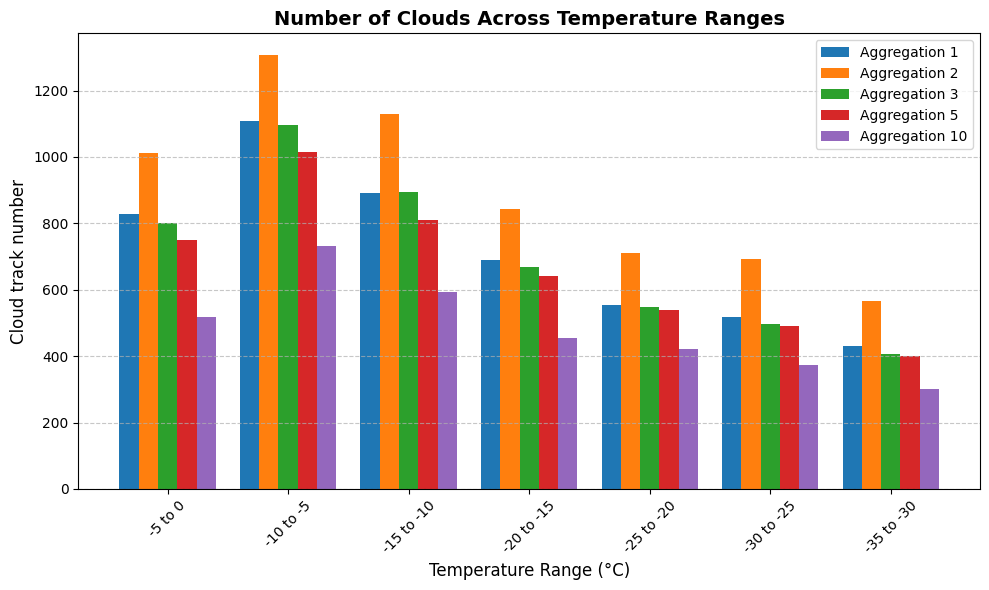

In [ ]:
# Generate labels
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range(len(min_temp_array))]
# Set up figure
plt.figure(figsize=(10,6))

# Define bar width and offsets
bar_width = 0.8/len(agg_fact_list)
x = np.arange(len(labels))

# Plot each bar set with an offset
for j in range(len(agg_fact_list)):
    plt.bar(x + j * bar_width, cloud_count[j, :], width=bar_width, label=f"Aggregation {agg_fact_list[j]}")

# Set x-axis labels
plt.xticks(x + (len(agg_fact_list) - 1) * bar_width / 2, labels, rotation=45)

# Add title, labels, and grid
plt.title('Number of Clouds Across Temperature Ranges', fontsize=14, fontweight='bold')
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Cloud track number', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.savefig("/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/WG_agg_n_clouds_original_included_11_11_tracknumber.png",dpi=400)
plt.show()


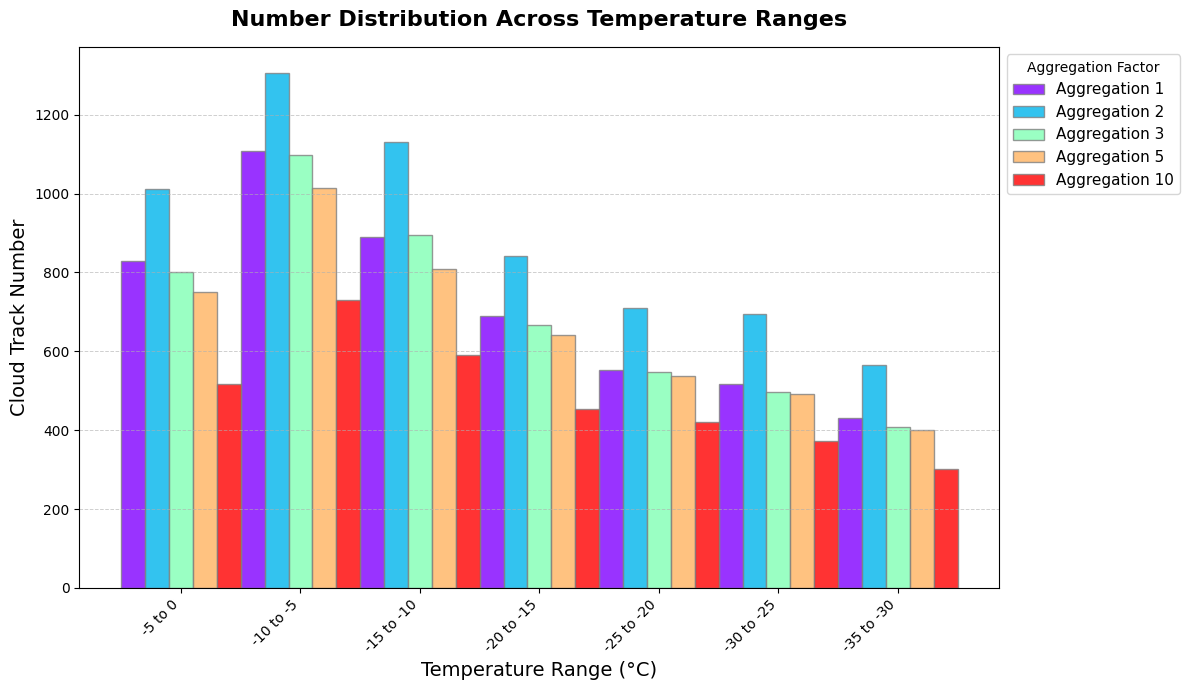

In [ ]:
# Generate labels
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range(len(min_temp_array))]

# Set up figure
plt.figure(figsize=(12, 7))

# Define bar width and offsets
bar_width = 0.2
x = np.arange(len(labels))

# Define a rainbow color scheme
colors = plt.cm.rainbow(np.linspace(0, 1, len(agg_fact_list)))

# Plot each bar set with an offset and rainbow color scheme
for j in range(len(agg_fact_list)):
    plt.bar(
        x + j * bar_width, 
        cloud_count[j, :], 
        width=bar_width, 
        color=colors[j], 
        alpha=0.8, 
        edgecolor='grey', 
        label=f"Aggregation {agg_fact_list[j]}"
    )

# Set x-axis labels and align them in the center
plt.xticks(x + (len(agg_fact_list) - 1) * bar_width / 2, labels, rotation=45, ha='right')

# Add title, labels, and a light grid
plt.title('Number Distribution Across Temperature Ranges', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Temperature Range (°C)', fontsize=14)
plt.ylabel('Cloud Track Number', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Move legend outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Aggregation Factor", fontsize=11)

# Adjust layout and show plot
plt.tight_layout()
plt.show()